<font size="5">Кейс 2. Создание прогнозной модели для мобильного приложения: предсказание оценки пользователя (от 1 до 5) мобильному приложению</font>

<font size="3">Компания: пенсионный фонд, предоставляющий клиентам цифровые сервисы для управления пенсионными накоплениями.

Продукт: мобильное приложение фонда, которое позволяет пользователям получать персональную информацию, оформлять услуги и отслеживать пенсионные выплаты. Задача решается в рамках цифровой трансформации фонда, направленной на повышение удобства и удовлетворенности граждан при взаимодействии с госуслугами.

Проблема продукта. Несмотря на рост цифровизации, часть пользователей остается недовольной функциональностью или стабильностью приложения, что приводит к низким оценкам и жалобам. Это мешает фонду объективно оценивать качество предоставляемых электронных услуг и снижает доверие к цифровой инфраструктуре.

В файле содержатся данные об оценке, поставленной пользователями мобильному приложению.
</font>

В рамках решения кейса вам будет необходимо:

<font size="4">

1. Изучить датасет, провести EDA, предоставить бизнес-заказчикам практические инсайты, поддерживающие принятие решений на основе данных.

2. Сформулировать аналитические выводы для ML-отдела для последующей разработки модели, прогнозирующей прибыльность рекламного показа.

3. Подготовить дашборд, который содержит графики и визуализации, отражающие ключевые выводы анализа данных. Он должен демонстрировать выявленные закономерности и инсайты, быть понятным для пользователей без технической подготовки и служить инструментом для принятия решений на основе данных.

4. Подготовить все артефакты работы и презентацию с решения:
    - Ноутбук .ipynb с расчетами и визуализациями инсайтов.
    - Дашборд на платформе gradio.app.
    - Презентацию для защиты решения (.pdf).</font>

Гипотеза 1: Влияние возраста на оценку
Нулевая гипотеза (H0): Средние оценки приложения не различаются между возрастными группами.
Альтернативная гипотеза (H1): Существует статистически значимая разница в средних оценках приложения между возрастными группами.

Гипотеза 2: Влияние стажа на удовлетворенность
Нулевая гипотеза (H0): Нет корреляции между стажем пользователя и оценкой приложения.
Альтернативная гипотеза (H1): Существует статистически значимая корреляция между стажем пользователя и оценкой приложения.

Гипотеза 3: Влияние дохода на удовлетворенность
Нулевая гипотеза (H0): Средние оценки приложения не различаются между группами с разным уровнем дохода.
Альтернативная гипотеза (H1): Существует статистически значимая разница в средних оценках приложения между группами с разным уровнем дохода.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
app_survey = pd.read_csv('app_survey.csv')

Колонки данных в датасете:

user_id — id пользователя;

survey_creation_dt — дата создания опроса;

survey_response_dt — дата ответа на опрос;

language — язык пользователя;

age — возраст пользователя;

gender — пол пользователя;

tenure_years — стаж пользователя в годах;

user_income — доход пользователя;

csat_level — оценка пользователя.

In [3]:
print("Первые 5 строк:")
app_survey.head()

Первые 5 строк:


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


In [4]:
print("Размер датасета:", app_survey.shape)
print("\nТипы данных признаков:")
app_survey.info()

print("\nКоличество пропусков в данных:")
print(app_survey.isnull().sum())

Размер датасета: (42387, 9)

Типы данных признаков:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42387 entries, 0 to 42386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             42387 non-null  object 
 1   survey_creation_dt  42387 non-null  object 
 2   survey_response_dt  42387 non-null  object 
 3   csat_level          42387 non-null  int64  
 4   language            35561 non-null  object 
 5   age                 40939 non-null  object 
 6   gender              42387 non-null  object 
 7   tenure_years        42387 non-null  float64
 8   user_income         32013 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.9+ MB

Количество пропусков в данных:
user_id                   0
survey_creation_dt        0
survey_response_dt        0
csat_level                0
language               6826
age                    1448
gender                    0
tenure_year

<font size="5">Есть пропуски в колонках language, age, user_income</font>

In [5]:
def convert_survey_dates(df):
    """
    Преобразует колонки survey_creation_dt и survey_response_dt к типу datetime.

    Args:
    df (pd.DataFrame): DataFrame с колонками survey_creation_dt и survey_response_dt

    Return:
    pd.DataFrame: DataFrame с преобразованными колонками
    """
    # Преобразование survey_creation_dt
    if "survey_creation_dt" in df.columns:
        df["survey_creation_dt"] = pd.to_datetime(
            df["survey_creation_dt"], errors="coerce"
        )
        print(
            f"Колонка survey_creation_dt преобразована к типу datetime. Тип: {df['survey_creation_dt'].dtype}"
        )

    # Преобразование survey_response_dt
    if "survey_response_dt" in df.columns:
        df["survey_response_dt"] = pd.to_datetime(
            df["survey_response_dt"], errors="coerce"
        )
        print(
            f"Колонка survey_response_dt преобразована к типу datetime. Тип: {df['survey_response_dt'].dtype}"
        )

    return df

app_survey = convert_survey_dates(app_survey)
app_survey.info()

Колонка survey_creation_dt преобразована к типу datetime. Тип: datetime64[ns]
Колонка survey_response_dt преобразована к типу datetime. Тип: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42387 entries, 0 to 42386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             42387 non-null  object        
 1   survey_creation_dt  42387 non-null  datetime64[ns]
 2   survey_response_dt  42387 non-null  datetime64[ns]
 3   csat_level          42387 non-null  int64         
 4   language            35561 non-null  object        
 5   age                 40939 non-null  object        
 6   gender              42387 non-null  object        
 7   tenure_years        42387 non-null  float64       
 8   user_income         32013 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 2.9+ MB


In [6]:
print("Статистика по числовым столбцам (оценка и стаж):")
app_survey.describe()

Статистика по числовым столбцам (оценка и стаж):


,survey_creation_dt,survey_response_dt,csat_level,tenure_years
count,42387,42387,42387.000000,42387.000000
mean,2025-05-05 11:25:42.951258624,2025-05-06 22:08:36.103427840,4.102767,9.801147
min,2025-04-12 04:07:31,2025-04-12 14:33:44,1.000000,0.000000
25%,2025-04-28 08:03:24.500000,2025-04-29 13:08:38,4.000000,2.132807
50%,2025-05-05 13:34:30,2025-05-07 00:34:37,5.000000,9.308819
75%,2025-05-12 14:32:13.500000,2025-05-14 10:38:36,5.000000,16.941052
max,2025-05-27 15:01:24,2025-05-30 04:08:12,5.000000,21.195642
std,NaN,NaN,1.506246,7.591410


Распределение данных по языковому и половому признакам

In [7]:
# Категориальные признаки
categorical_cols = ['language', 'gender']
for col in categorical_cols:
    print(f"\nКоличество значений в {col}:")
    print(app_survey[col].value_counts())


Количество значений в language:
language
RU    35561
Name: count, dtype: int64

Количество значений в gender:
gender
M    32413
F     9974
Name: count, dtype: int64


In [8]:
# Заполняем пропущенные значения в колонке language значением Неизвестно
app_survey['language'] = app_survey['language'].fillna('Неизвестно')

# Заполняем пропущенные значения в колонке age значением Неизвестно
app_survey['age'] = app_survey['age'].fillna('Неизвестно')

# Заполняем пропущенные значения в колонке user_income значением Неизвестно
app_survey['user_income'] = app_survey['user_income'].fillna('Неизвестно')

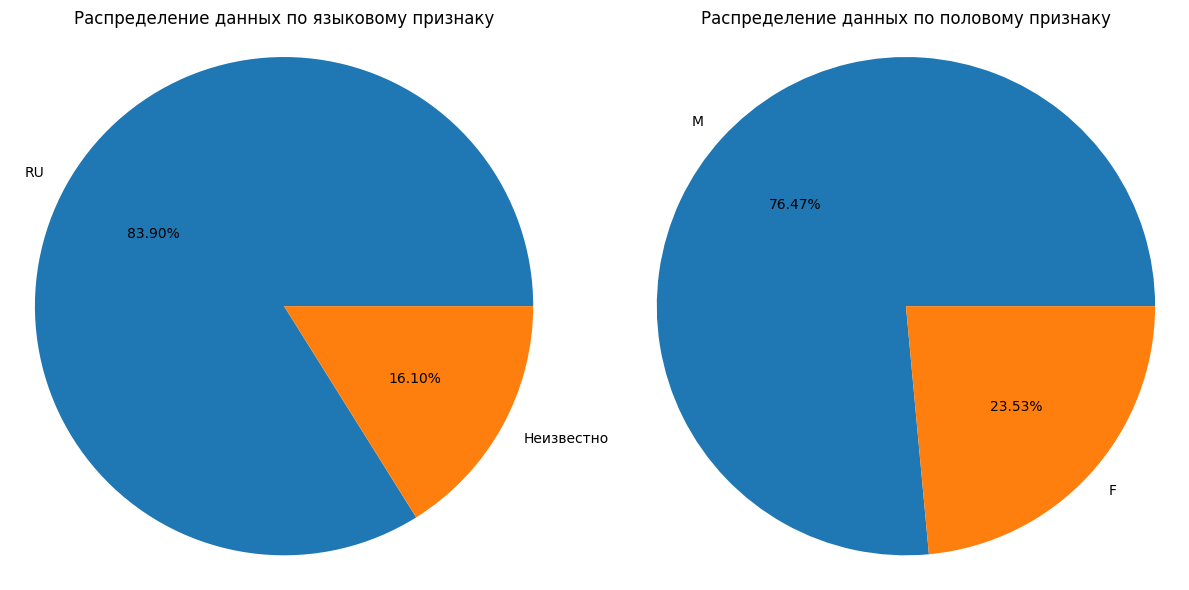

In [9]:
# Строим график распределения данных по языковому признаку
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

language_counts = app_survey['language'].value_counts()
axes[0].pie(language_counts, labels=language_counts.index, autopct='%1.2f%%')
axes[0].set_title('Распределение данных по языковому признаку')
axes[0].axis('equal')

# Строим график распределения данных по половому признаку
gender_counts = app_survey['gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
axes[1].set_title('Распределение данных по половому признаку')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

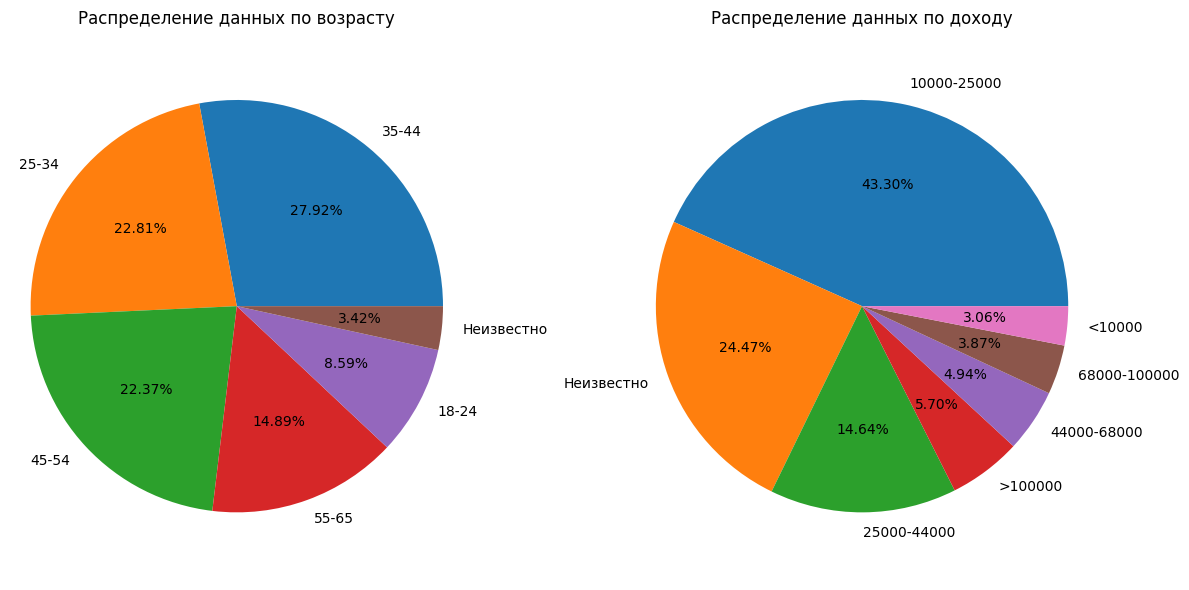

In [10]:
# Строим график распределения данных по возрасту и доходу
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

language_counts = app_survey['age'].value_counts()
axes[0].pie(language_counts, labels=language_counts.index, autopct='%1.2f%%')
axes[0].set_title('Распределение данных по возрасту')
axes[0].axis('equal')

# Строим график распределения данных по доходу
gender_counts = app_survey['user_income'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
axes[1].set_title('Распределение данных по доходу')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

Доля пропущенных данных в колонке user_income (доход пользователя) значительна (четверть от общего)

Распределение оценок:
csat_level
1     6732
2     1187
3     2175
4     3192
5    29101
Name: count, dtype: int64


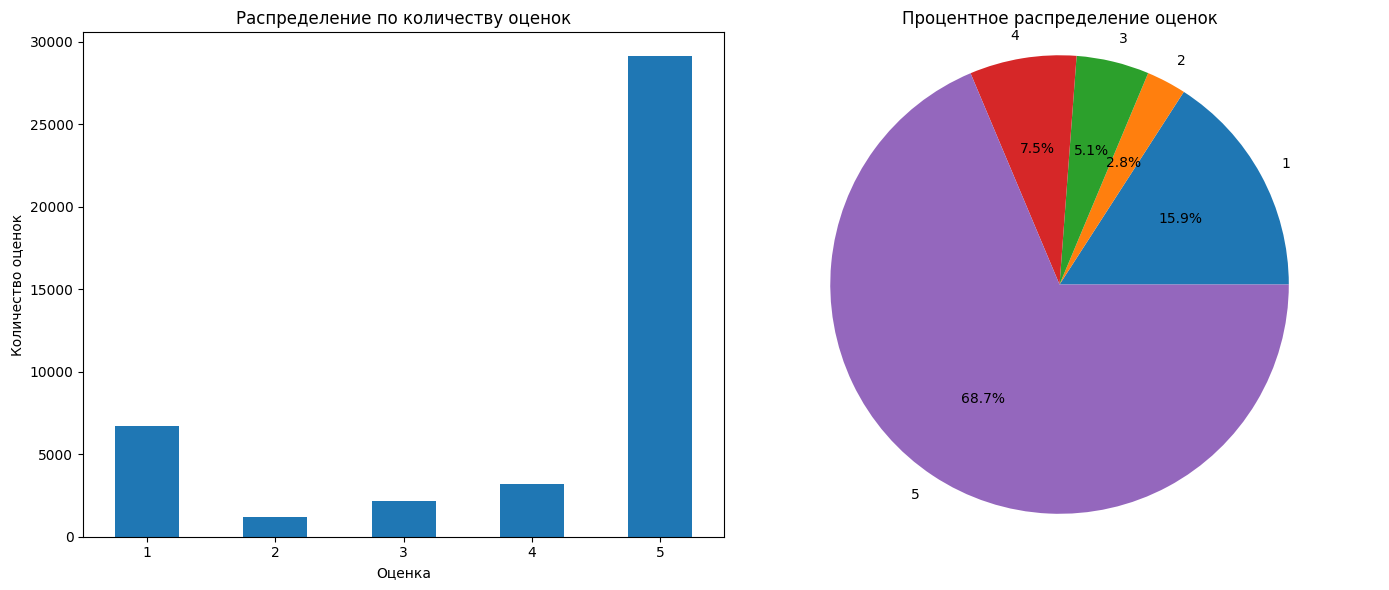

In [11]:
# Распределение значений csat_level по оценкам (1-5)
print("Распределение оценок:")
print(app_survey['csat_level'].value_counts().sort_index())

# Строим график
csat_counts = app_survey['csat_level'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
csat_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение по количеству оценок')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Количество оценок')
axes[0].tick_params(axis='x', rotation=0)

# Круговая
axes[1].pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%')
axes[1].set_title('Процентное распределение оценок')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

In [12]:
# Средняя оценка по полу
print("Средняя оценка по полу:")
print(app_survey.groupby('gender')['csat_level'].mean())

Средняя оценка по полу:
gender
F    4.050732
M    4.118780
Name: csat_level, dtype: float64


Разброс оценок по половому признаку незначителен

In [13]:
# Средняя оценка по языку пользователя
print("Средняя оценка по языку пользователя:")
print(app_survey.groupby('language')['csat_level'].mean())

Средняя оценка по языку пользователя:
language
RU            4.084137
Неизвестно    4.199824
Name: csat_level, dtype: float64


Разброс оценок по языковому признаку незначителен

In [14]:
# Корреляция между оценкой и стажем пользователя
print("Корреляция между оценкой и стажем пользователя:")
print(app_survey[['tenure_years', 'csat_level']].corr())

Корреляция между оценкой и стажем пользователя:
              tenure_years  csat_level
tenure_years      1.000000    0.010849
csat_level        0.010849    1.000000


Корреляция между оценкой и стажем пользователя очень низкая

Средняя оценка по возрастным группам:
age
18-24         3.914011
25-34         4.028131
35-44         4.144825
45-54         4.148476
55-65         4.172370
Неизвестно    4.129144
Name: csat_level, dtype: float64


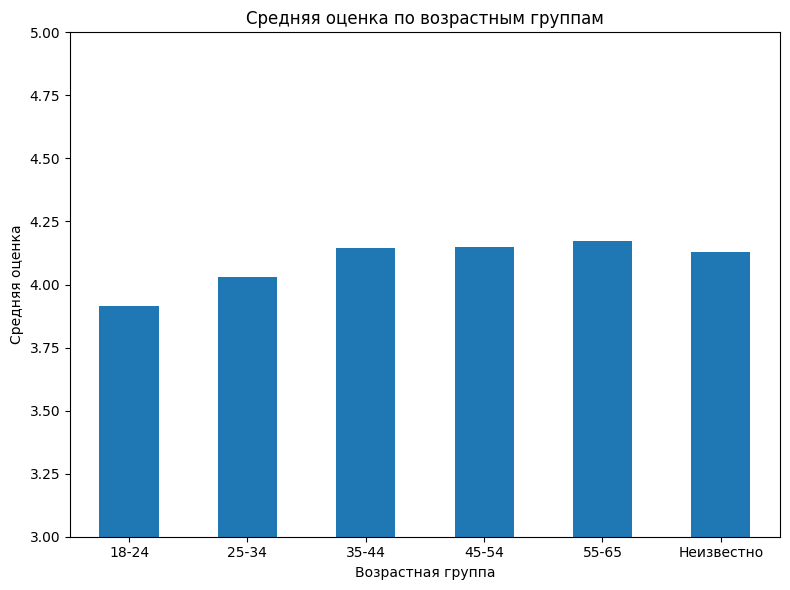

In [15]:
# Средняя оценка по возрастным группам
print("Средняя оценка по возрастным группам:")
print(app_survey.groupby('age')['csat_level'].mean().sort_index())

# Строим график
csat_counts = app_survey.groupby('age')['csat_level'].mean().sort_index()
plt.figure(figsize=(8, 6))
csat_counts.plot(kind='bar')
plt.title('Средняя оценка по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=0)
plt.ylim(3, 5)

plt.tight_layout()
plt.show()

Наиболее низкие оценки ставят пользователи из младшей возрастной группы (18 - 24)

Средняя оценка по доходу:
user_income
<10000          4.220169
10000-25000     4.239348
25000-44000     4.200290
44000-68000     3.952745
68000-100000    3.879951
>100000         3.921009
Неизвестно      3.895990
Name: csat_level, dtype: float64


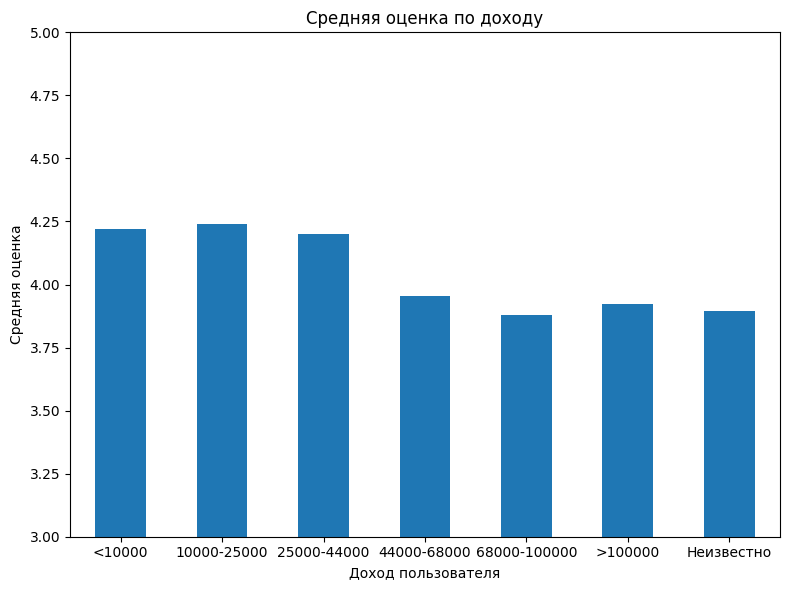

In [16]:
# Средняя оценка по доходу
csat_mean = app_survey.groupby('user_income')['csat_level'].mean()
income_order = ['<10000', '10000-25000', '25000-44000', '44000-68000', '68000-100000', '>100000', 'Неизвестно']
csat_mean = csat_mean.reindex(income_order)

print("Средняя оценка по доходу:")
print(csat_mean)

# Строим график
plt.figure(figsize=(8, 6))
csat_mean.plot(kind='bar')
plt.title('Средняя оценка по доходу')
plt.xlabel('Доход пользователя')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=0)
plt.ylim(3, 5)

plt.tight_layout()
plt.show()

Наиболее низкие оценки ставят пользователи с большими доходами (> 68 000), а также с неизвестным доходом

<font size="5">Feature engineering</font>

In [17]:
# Статистика по времени отклика пользователя на опрос
app_survey['survey_creation_dt'] = pd.to_datetime(app_survey['survey_creation_dt'])
app_survey['survey_response_dt'] = pd.to_datetime(app_survey['survey_response_dt'])
app_survey['response_time_days'] = (app_survey['survey_response_dt'] - app_survey['survey_creation_dt']).dt.days

print("\nСтатистика по времени отклика:")
print(app_survey['response_time_days'].describe())

print("\nКорреляция между временем отклика и оценкой:")
print(app_survey[['response_time_days', 'csat_level']].corr())


Статистика по времени отклика:
count    42387.000000
mean         0.984193
std          8.749565
min        -20.000000
25%         -5.000000
50%          1.000000
75%          7.000000
max         31.000000
Name: response_time_days, dtype: float64

Корреляция между временем отклика и оценкой:
                    response_time_days  csat_level
response_time_days            1.000000    0.009001
csat_level                    0.009001    1.000000


Есть аномальные значения (отрицательная разница между датой ответа на опрос и датой создания опроса) во временных данных -> дата ответа на опрос более ранняя, чем дата создания опроса.
Предполагаем, что значения в этих колонках были перепутаны местами, поэтому сделаем обратную замену для аномальных значений.

In [18]:
# Находим строки где survey_response_dt < survey_creation_dt
mask = app_survey['survey_response_dt'] < app_survey['survey_creation_dt']

# Меняем местами значения в survey_creation_dt и survey_response_dt для найденных строк
app_survey.loc[mask, ['survey_creation_dt', 'survey_response_dt']] = app_survey.loc[mask, ['survey_response_dt', 'survey_creation_dt']].values

# Проверяем
print("Количество найденных аномальных значений:", mask.sum())


Количество найденных аномальных значений: 18400


In [19]:
# Проверяем еще раз сатистику по времени отклика пользователя на опрос
app_survey['response_time_days'] = (app_survey['survey_response_dt'] - app_survey['survey_creation_dt']).dt.days

print("\nСтатистика по времени отклика:")
print(app_survey['response_time_days'].describe())

print("\nКорреляция между временем отклика и оценкой:")
print(app_survey[['response_time_days', 'csat_level']].corr())


Статистика по времени отклика:
count    42387.000000
mean         6.725010
std          5.153229
min          0.000000
25%          2.000000
50%          6.000000
75%         10.000000
max         31.000000
Name: response_time_days, dtype: float64

Корреляция между временем отклика и оценкой:
                    response_time_days  csat_level
response_time_days            1.000000   -0.004341
csat_level                   -0.004341    1.000000


Корреляция между оценкой и временем отклика низкая